In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import logging

In [17]:
df = pd.read_csv('/Users/jaya/Desktop/Sustainable-Future/Mill Road Traffic Data.csv')

In [18]:
df.columns

Index(['Junction Code', 'Day', 'Time of the Day', 'Traffic Lane 1',
       'Traffic Lane 2', 'Traffic Lane 1 #', 'Traffic Lane 2 #', 'Sum'],
      dtype='object')

In [19]:
df

,Junction Code,Day,Time of the Day,Traffic Lane 1,Traffic Lane 2,Traffic Lane 1 #,Traffic Lane 2 #,Sum
0,G,Monday,6:00,Green,Green,0,0,0
1,G,Monday,8:00,Green,Orange,0,3,3
2,G,Monday,10:00,Orange,Orange,3,3,6
3,G,Monday,12:00,Orange,Orange,3,3,6
4,G,Monday,14:00,Orange,Orange,3,3,6
...,...,...,...,...,...,...,...,...
247,J,Sunday,14:00,Green,Green,0,0,0
248,J,Sunday,16:00,Green,Green,0,0,0
249,J,Sunday,18:00,Green,Green,0,0,0
250,J,Sunday,20:00,Green,Green,0,0,0


In [20]:
df['Mean'] = df['Sum']/2

In [21]:
df = df.groupby(['Junction Code', 'Day', 'Time of the Day']).mean().drop(['Traffic Lane 1 #','Traffic Lane 2 #'], axis=1)

In [22]:
df

Sum  Mean
Junction Code Day       Time of the Day           
G             Friday    10:00            6.0   3.0
                        12:00            6.0   3.0
                        14:00            8.0   4.0
                        16:00            8.0   4.0
                        18:00            6.0   3.0
...                                      ...   ...
J             Wednesday 18:00            6.0   3.0
                        20:00            3.0   1.5
                        22:00            0.0   0.0
                        6:00             0.0   0.0
                        8:00             0.0   0.0

[252 rows x 2 columns]

In [23]:
time_df = pd.DataFrame(['6:00', '8:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00'], columns=['Time of the Day'])

In [24]:
time_df.set_index('Time of the Day', inplace=True)

In [25]:
test = df.loc['H'].loc['Monday'].join(time_df, how='right')
test

,Sum,Mean
Time of the Day,,
6:00,0.0,0.0
8:00,3.0,1.5
10:00,6.0,3.0
12:00,6.0,3.0
14:00,6.0,3.0
16:00,6.0,3.0
18:00,6.0,3.0
20:00,6.0,3.0
22:00,0.0,0.0


In [32]:
color_code = {0.0:'green', 0.5:'green', 1.0:'green', 1.5:'green', 
2.0:'orange', 2.5:'orange', 3.0:'orange', 
3.5:'red', 4.0:'red', 4.5:'red', 
5:'darkred', 5.5:'darkred', 6.0:'darkred'}

def diff_calc(t, t_1):
    if (t < t_1) and ((t - t_1) < 0):
        return color_code[t_1]
    elif (t > t_1) and ((t - t_1) > 0):
        return color_code[t]
    elif t == t_1:
        return color_code[t_1]


In [33]:
traffic_list = []

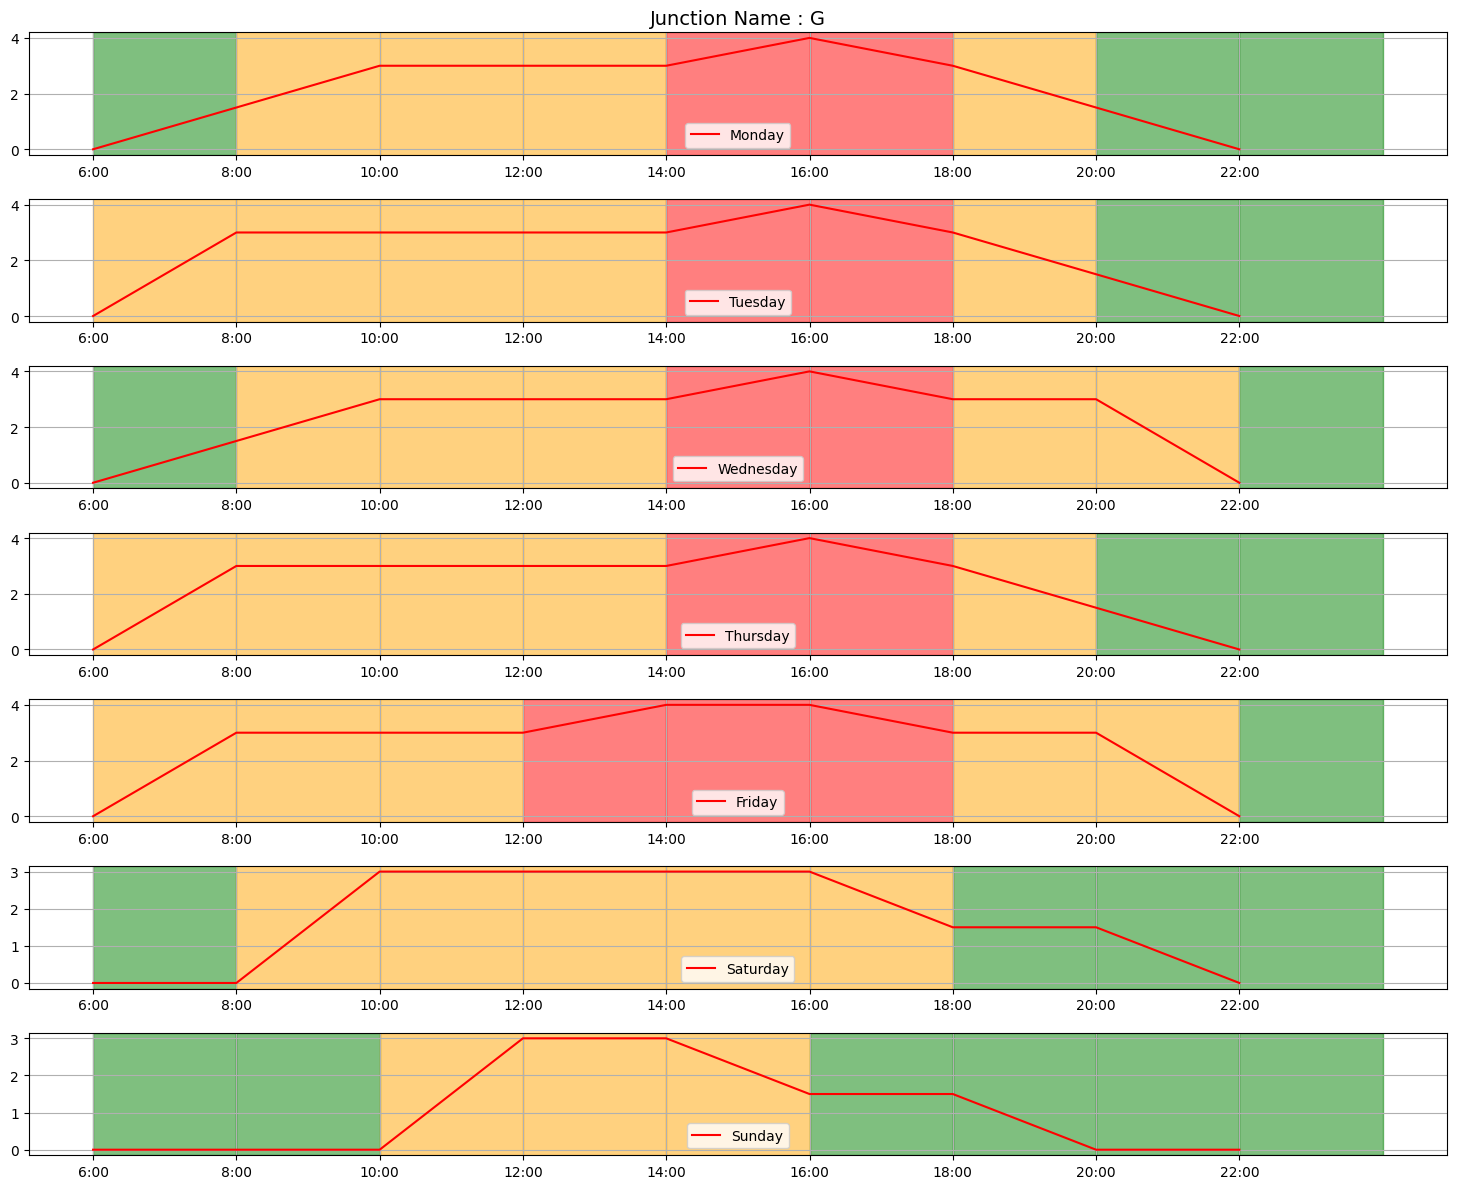

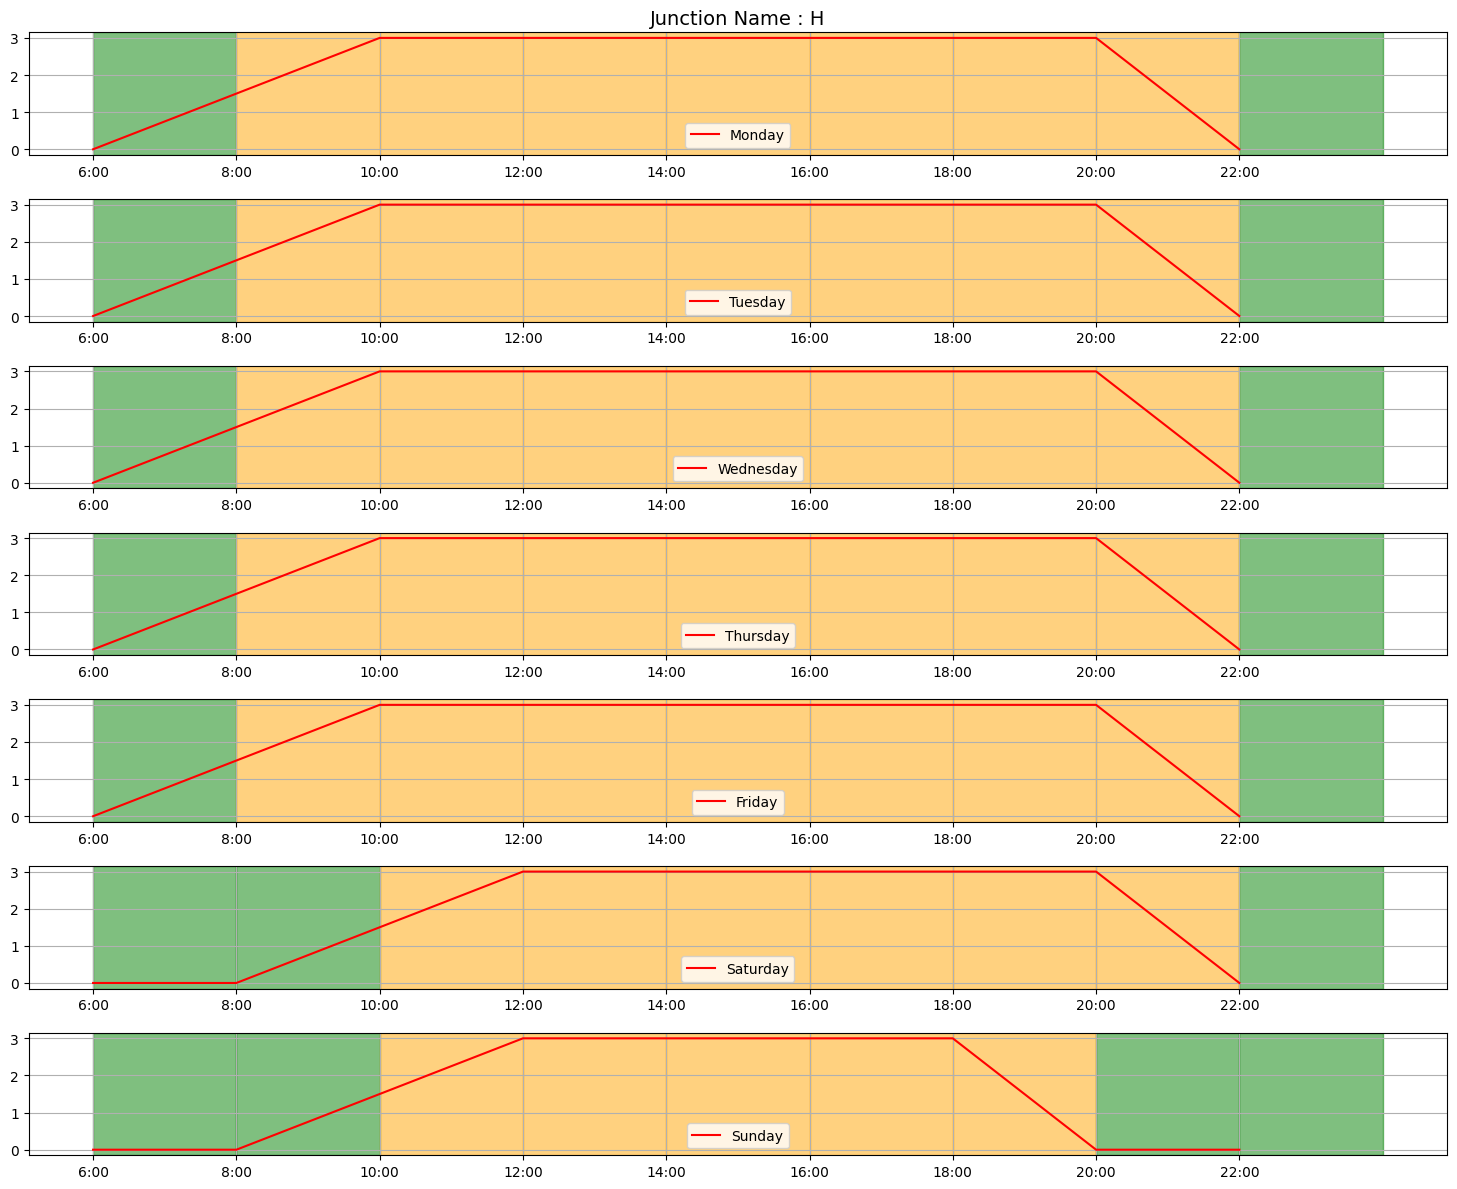

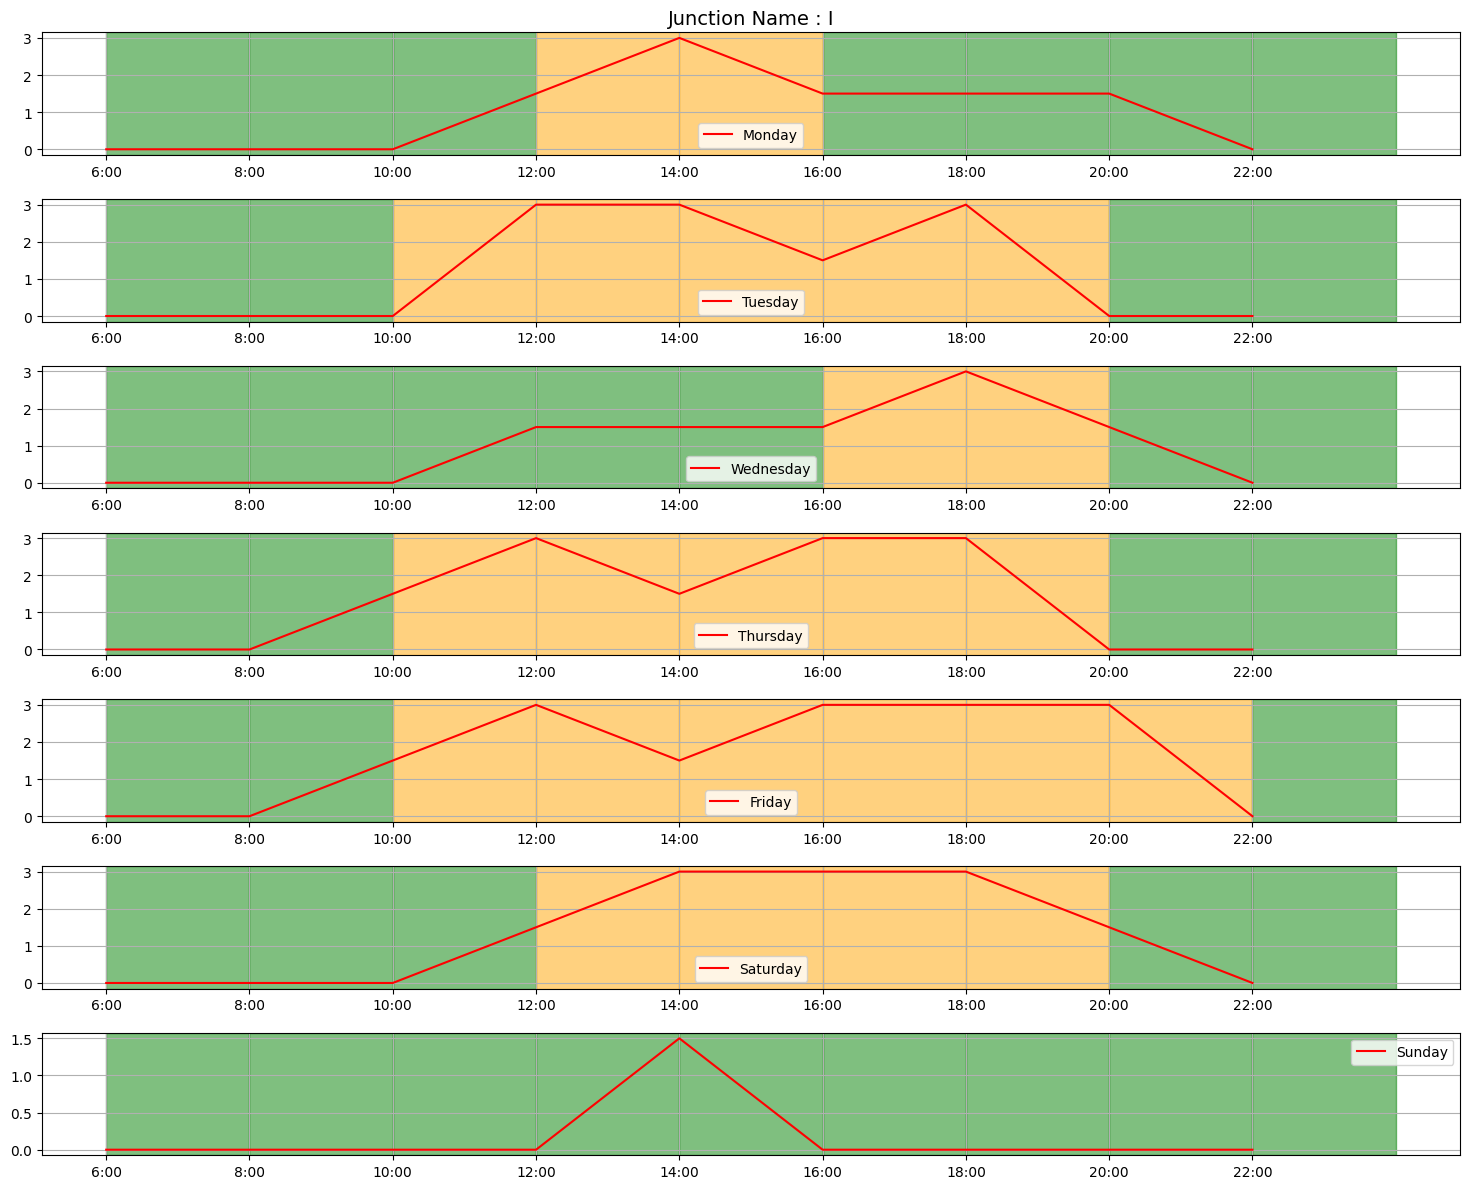

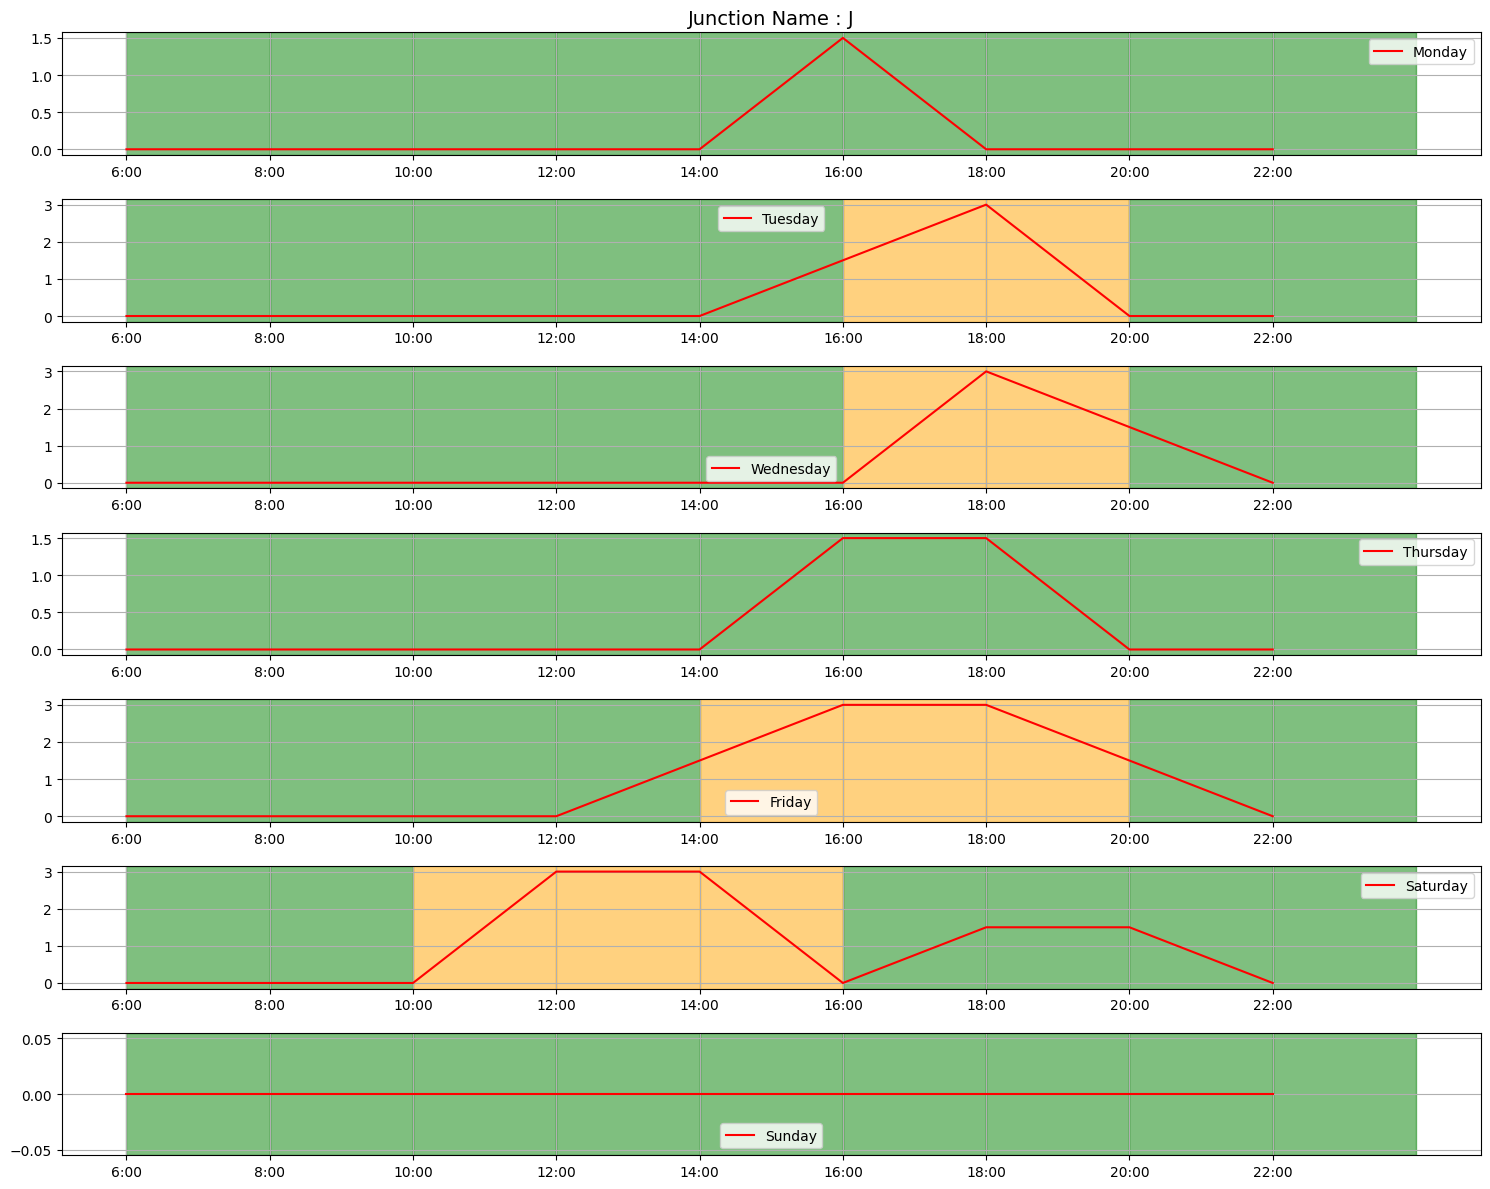

In [34]:
days_ = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
junction_ = ['G', 'H', 'I', 'J']


for jun in junction_:
    fig, ax = plt.subplots(nrows=7,ncols=1, figsize=(15, 12))
    ax[0].set_title(f'Junction Name : {jun}', fontsize = 14)
    fig.tight_layout()
    for i, day in enumerate(days_):
        per_day_value = df.loc[jun].loc[day]
        
        per_day_value = time_df.join(per_day_value, how='left')
        per_day_value.reset_index(inplace=True)
         
        ax[i].plot(per_day_value['Time of the Day'], per_day_value['Mean'], label=day, color='r')
    
        per_day_value['Mean_t_1'] = per_day_value['Mean'].shift(-1, fill_value= 0)
        for index, t, t_1 in zip(per_day_value.index, per_day_value['Mean'], per_day_value['Mean_t_1']):
            plot_shade = diff_calc(t, t_1)
            ax[i].axvspan(index, index+1, color= plot_shade, alpha= 0.5)
            traffic_list.append([jun, day, index, plot_shade])
        

        ax[i].grid()
        ax[i].legend()
    plt.savefig('Traffic Congestion_'+jun)

In [ ]:
times = ['6:00', '8:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00']
traffic_report = pd.DataFrame(traffic_list, columns=['Junction', 'Day', 'Time', 'Traffic Category'])

In [ ]:
traffic_report

,Junction,Day,Time,Traffic Category
0,G,Monday,6:00,red
1,G,Monday,8:00,red
2,G,Monday,10:00,darkred
3,G,Monday,12:00,darkred
4,G,Monday,14:00,red
...,...,...,...,...
247,J,Sunday,14:00,green
248,J,Sunday,16:00,green
249,J,Sunday,18:00,green
250,J,Sunday,20:00,green


In [ ]:
traffic_report['Time'] = traffic_report['Time'].apply(lambda x: times[x])

In [ ]:
traffic_report.groupby(['Junction', 'Day', 'Time']).count()

Traffic Category
Junction Day       Time                   
G        Friday    10:00                 1
                   12:00                 1
                   14:00                 1
                   16:00                 1
                   18:00                 1
...                                    ...
J        Wednesday 18:00                 1
                   20:00                 1
                   22:00                 1
                   6:00                  1
                   8:00                  1

[252 rows x 1 columns]

In [ ]:
peak_hours = traffic_report[(traffic_report['Traffic Category'] == 'red') | (traffic_report['Traffic Category'] == 'darkred')]

In [ ]:
peak_hours.groupby('Time').count()

,Junction,Day,Traffic Category
Time,,,
10:00,21,21,21
12:00,20,20,20
14:00,20,20,20
16:00,16,16,16
18:00,9,9,9
6:00,10,10,10
8:00,15,15,15


## Aeroqual data analysis

In [17]:
sensor_data = pd.read_csv("All time data.csv")

In [5]:
sensor_data.columns

Index(['Unnamed: 0', 'datetime', 'PM25(Custom)', 'PM10(Custom)', 'CO2(Custom)',
       'Location ID', 'CO2(aero)', 'NO2(aero)', 'PM10(aero)', 'PM2_5(aero)',
       'NO2(custom)', 'Unnamed: 2', 'Latitude', 'Longitude', 'Date', 'Time'],
      dtype='object')

In [18]:
sensor_data.shape

(28084, 16)

In [40]:
sensor_data.dropna(subset=['datetime'], inplace=True)
sensor_data.shape

(26621, 16)

In [50]:
aero_qual_data_columns = ['CO2(aero)', 'NO2(aero)', 'PM10(aero)', 'PM2_5(aero)']
WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [42]:
aero_qual_data = sensor_data[['datetime', 'Latitude', 'Longitude'] + aero_qual_data_columns]

In [43]:
aero_qual_data.head(2)

,datetime,Latitude,Longitude,CO2(aero),NO2(aero),PM10(aero),PM2_5(aero)
0,2022-05-17 10:44:06,52.192428,0.152364,NaN,NaN,NaN,NaN
1,2022-05-17 10:45:36,52.192428,0.152364,NaN,NaN,NaN,NaN


In [44]:
aero_qual_data['datetime'] = pd.to_datetime(aero_qual_data['datetime'], dayfirst=True)

<ipython-input-44-8cdbaf795a30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aero_qual_data['datetime'] = pd.to_datetime(aero_qual_data['datetime'], dayfirst=True)


In [45]:
aero_qual_data.shape

(26621, 7)

In [46]:
aero_qual_data.dtypes

datetime       datetime64[ns]
Latitude              float64
Longitude             float64
CO2(aero)              object
NO2(aero)              object
PM10(aero)             object
PM2_5(aero)            object
dtype: object

In [47]:
for c in aero_qual_data_columns:
  aero_qual_data[c] = aero_qual_data[c].apply(lambda x: np.NaN if x== '' or x == ' ' else x)
  aero_qual_data[c] = aero_qual_data[c].astype('float64')

<ipython-input-47-3686013ebef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aero_qual_data[c] = aero_qual_data[c].apply(lambda x: np.NaN if x== '' or x == ' ' else x)
<ipython-input-47-3686013ebef0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aero_qual_data[c] = aero_qual_data[c].astype('float64')


In [48]:
aero_qual_data.dtypes

datetime       datetime64[ns]
Latitude              float64
Longitude             float64
CO2(aero)             float64
NO2(aero)             float64
PM10(aero)            float64
PM2_5(aero)           float64
dtype: object

In [49]:
aero_qual_data['datetime'].dt.weekday[-5:]

26616    4
26617    4
26618    4
26619    4
26620    4
Name: datetime, dtype: int64

In [38]:
aero_qual_data.tail(5)

,datetime,Latitude,Longitude,CO2(aero),NO2(aero),PM10(aero),PM2_5(aero)
28079,NaT,NaN,NaN,NaN,NaN,NaN,NaN
28080,NaT,NaN,NaN,NaN,NaN,NaN,NaN
28081,NaT,NaN,NaN,NaN,NaN,NaN,NaN
28082,NaT,NaN,NaN,NaN,NaN,NaN,NaN
28083,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
sensor_data.tail(5)

,Unnamed: 0,datetime,PM25(Custom),PM10(Custom),CO2(Custom),Location ID,CO2(aero),NO2(aero),PM10(aero),PM2_5(aero),NO2(custom),Unnamed: 2,Latitude,Longitude,Date,Time
28079,28079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28080,28080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28081,28081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28082,28082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28083,28083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
